In [1]:
!pip install -qq pandas matplotlib seaborn scikit-learn geopy

In [2]:
!pip install -qq numpy==1.24.3

In [3]:
!pip install -qq statsmodels==0.13.5

In [4]:
import sys
from pathlib import Path
import pandas as pd 

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [5]:
from dd360.feature_importance import FeatureSelectionPipeline

df_clean = pd.read_parquet("../data/processed/final_df.parquet")

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   property_id                           4513 non-null   object 
 1   listing_type                          4513 non-null   object 
 2   property_type                         4513 non-null   object 
 3   url_ad                                4513 non-null   object 
 4   price                                 4513 non-null   float64
 5   terrain_surface                       4513 non-null   float64
 6   construction_surface                  4513 non-null   float64
 7   num_bathrooms                         4513 non-null   int64  
 8   num_parking_lots                      4513 non-null   int64  
 9   num_bedrooms                          4513 non-null   int64  
 10  built_year                            4513 non-null   int64  
 11  conservation_stat

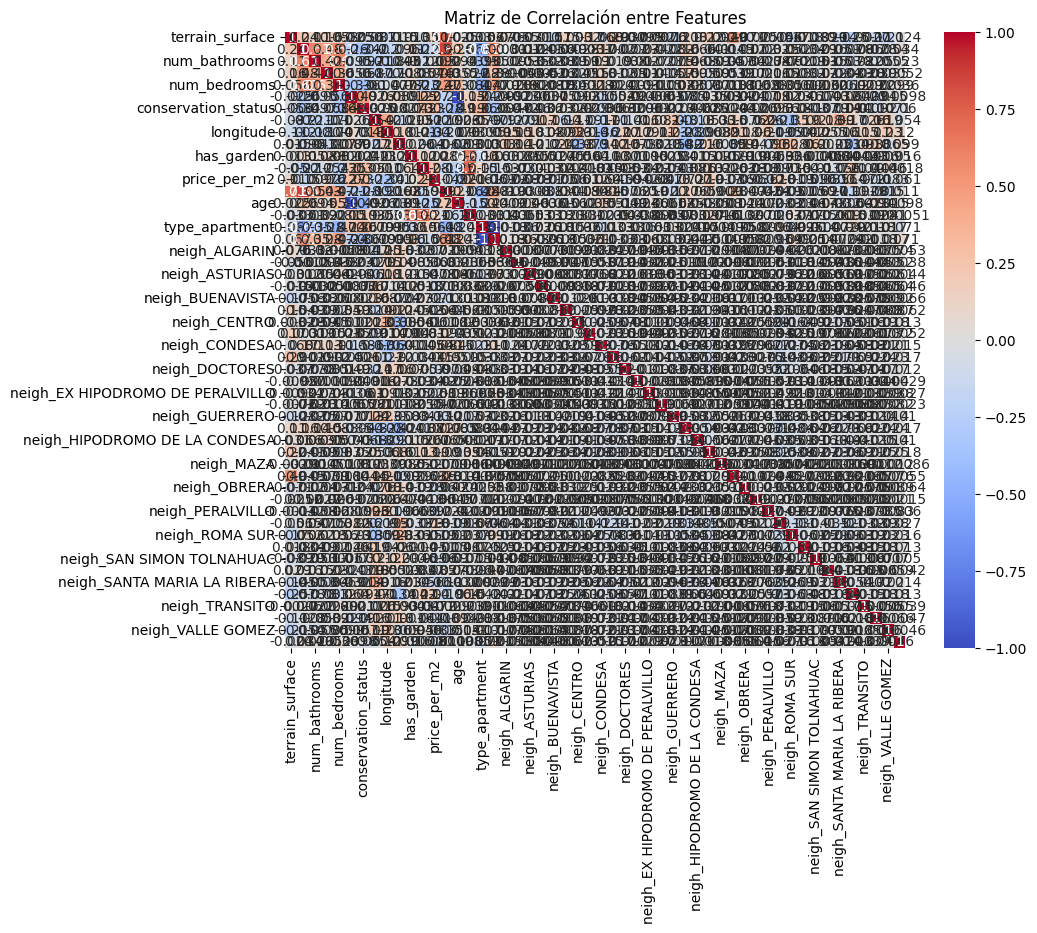


Correlación de cada feature con el target:
construction_surface                    0.807133
total_surface                           0.730636
num_bathrooms                           0.565878
num_parking_lots                        0.488752
type_house                              0.472716
num_bedrooms                            0.449936
price_per_m2                            0.362068
terrain_surface                         0.269269
neigh_HIPODROMO                         0.215883
neigh_CONDESA                           0.207770
has_garden                              0.109358
neigh_HIPODROMO DE LA CONDESA           0.105074
neigh_ROMA NORTE                        0.098315
age                                     0.090549
neigh_JUAREZ                            0.034036
has_amenities                           0.030155
neigh_ROMA SUR                          0.026886
neigh_CUAUHTEMOC                        0.023374
neigh_CENTRO URBANO BENITO JUAREZ       0.000263
neigh_MAZA               

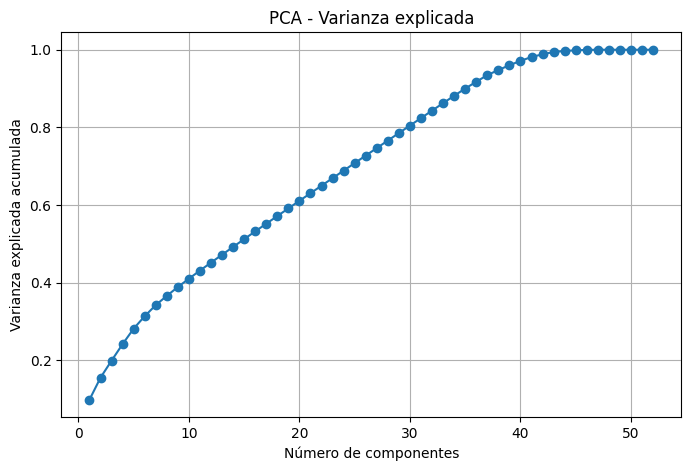


Loadings (importancia de features en cada componente):
                                           PC1       PC2       PC3       PC4  \
terrain_surface                       0.141460  0.183553 -0.085346  0.129756   
construction_surface                  0.382277  0.065571  0.099826  0.024472   
num_bathrooms                         0.275854  0.125567  0.067105  0.052774   
num_parking_lots                      0.222106  0.161703  0.089439 -0.011805   
num_bedrooms                          0.317717 -0.064238  0.088943  0.046129   
built_year                           -0.230359  0.250383  0.137408  0.198553   
conservation_status                  -0.233908  0.247216  0.053144  0.040076   
latitude                             -0.122897 -0.320131  0.238564 -0.150266   
longitude                            -0.113387 -0.362136  0.256572  0.198486   
id_neighborhood                      -0.040648 -0.078908 -0.082910  0.608628   
has_garden                            0.040621  0.085156  0.3690

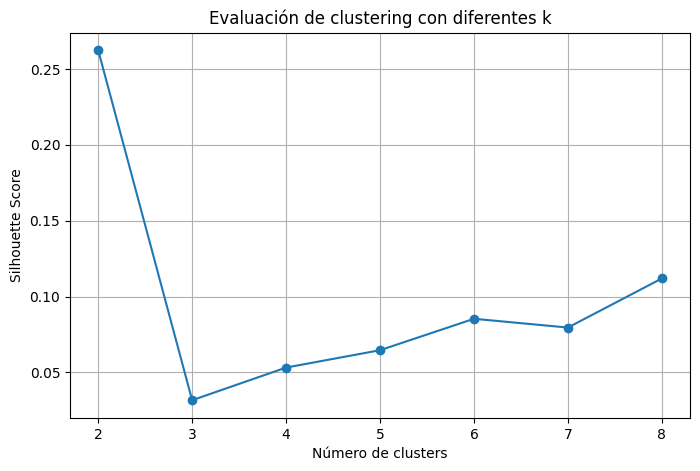

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     832.4
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:37:49   Log-Likelihood:                -71113.
No. Observations:                4513   AIC:                         1.423e+05
Df Residuals:                    4464   BIC:                         1.426e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [7]:
# Suponiendo que tu df limpio es df_clean y target es df_clean['price'] o la variable que quieras
features = df_clean.drop(columns=['price', 'property_id', 'listing_type', 'property_type', 'url_ad', 'neighborhood'])  # solo features numéricas

pipeline = FeatureSelectionPipeline(features, target=df_clean['price'])

# 1. Correlaciones
pipeline.plot_correlations()

# 2. PCA
pipeline.run_pca()

# 3. Clustering
pipeline.run_clustering(max_clusters=8)

pipeline.select_features(df_clean)

# 4. Regresión lineal
pipeline.run_linear_regression()

# 5. Regresión con PCA (5 componentes)
pipeline.run_regression_with_pca_components(n_components=5)


Conclusiones:

* El tamaño del inmueble (construcción, total, habitaciones, baños) y la ubicación específica (colonia y coordenadas) son los principales determinantes del precio.
En contraste, variables como tener gimnasio, jardín o estar en "buen estado" no impactan significativamente por sí solas, aunque podrían tener efectos no lineales o combinados.

* PC1-3 explican aspectos estructurales del inmueble: superficie, número de cuartos, y amenidades. 
* PC4-5-6 giran en torno a ubicación, edad y zona, lo que tiene sentido en inmuebles urbanos.

* El modelo explica bien el precio (90% del R²), y hay algunas variables fuertemente significativas como: Superficie construida, Número de baños, recámaras y estacionamientos, Tipo de propiedad y Algunas zonas específicas

